<a href="https://colab.research.google.com/github/gagarma/Proyecto-Final---Automotriz/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Proyecto Final: Predicción del precio de venta de autos en USA

Gustavo Garma

**Para este proyecto seleccione una base de ventas de vehiculos de segunda mano en USA.**

## Pre - operativo

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
archivo = "/content/drive/MyDrive/car_prices.csv"
df = pd.read_csv(archivo)
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


## Preguntas:


*   **¿Qué tipo de preguntas sobre ciencia de datos puedes responder en función de tus datos?**

    Con esta base puedo predecir el precio de venta de un carro dependiendo de distintas variables como su color, su kilometraje recorrido, la condición del auto,etc.

*   **¿Es esta una tarea supervisada o no supervisada?**

    Esta tarea sería supervisada, ya que conocemos los precios de estos vehiculos de antemano.

*   **Si se trata de una tarea supervisada, ¿es una tarea de regresión o clasificación?**

    Es una tarea de regresión, ya que el precio es una variable númerica nominal.

*   **¿Qué tan limpios están tus datos?**

    Hay datos nulos, columnas de valor único, columnas que no aportan valor a nuestro análisis y posiblemente datos duplicados.

*   **¿Qué problemas crees que pueden surgir?**

    Al ser una base muy grande, pueden existir valores outliers o valores erroneos, por lo que habra que hacer una revisión columna por columna.








## Limpieza

In [5]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [6]:
df[df.duplicated()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


**No hay duplicados en la base.**

In [7]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

**Vemos que hay muchos nulos en varias columnas.**

### Columna 1: Year

In [8]:
df["year"].value_counts(sort=False)

year
2015      9437
2014     81070
2013     98168
2012    102315
2011     48548
2010     26485
2009     20594
2008     31502
2007     30845
2006     26913
2005     21394
2004     17342
2003     13281
2002      9715
2001      6468
2000      5227
1999      3363
1998      2149
1995       711
1996       851
1997      1546
1987         8
1994       392
1993       205
1992       132
1989        20
1991        67
1990        49
1986        11
1985        10
1988        11
1984         5
1982         2
1983         1
Name: count, dtype: int64

**Hay algunos años que tienen muy poco valores y no resultan significativos para realizar una predicción, por lo tanto se borrarán todos los años que tengan una cantidad menor a los 500 valores.**

In [9]:
df=df.drop(df[df["year"]==1982].index)
df=df.drop(df[df["year"]==1983].index)
df=df.drop(df[df["year"]==1984].index)
df=df.drop(df[df["year"]==1985].index)
df=df.drop(df[df["year"]==1986].index)
df=df.drop(df[df["year"]==1987].index)
df=df.drop(df[df["year"]==1988].index)
df=df.drop(df[df["year"]==1989].index)
df=df.drop(df[df["year"]==1990].index)
df=df.drop(df[df["year"]==1991].index)
df=df.drop(df[df["year"]==1992].index)
df=df.drop(df[df["year"]==1993].index)
df=df.drop(df[df["year"]==1994].index)

**Ahora si la columna esta limpia.**

### Columna 2: make

In [10]:
df["make"].value_counts(dropna=False).head(40)

make
Ford             93484
Chevrolet        60159
Nissan           53922
Toyota           39709
Dodge            30709
Honda            27070
Hyundai          21816
BMW              20705
Kia              18077
Chrysler         17273
Mercedes-Benz    17099
Jeep             15355
Infiniti         15298
Volkswagen       12581
Lexus            11806
GMC              10611
NaN              10168
Mazda             8338
Cadillac          7495
Acura             5888
Audi              5869
Lincoln           5745
Buick             5081
Subaru            5043
Ram               4574
Pontiac           4490
Mitsubishi        4139
Volvo             3781
MINI              3224
Saturn            2831
Mercury           1973
Land Rover        1735
Scion             1687
Jaguar            1419
Porsche           1383
Suzuki            1073
FIAT               865
HUMMER             805
Saab               484
ford               438
Name: count, dtype: int64

**Vemos que hay muchos modelos que estan en minusculas y esto hace que se sumen de forma incorrecta.**

In [11]:
df["make"].replace("plymouth","Plymouth",inplace=True)
df["make"].replace("nissan","Nissan",inplace=True)
df["make"].replace("chevrolet","Chevrolet",inplace=True)
df["make"].replace("ford","Ford",inplace=True)
df["make"].replace("toyota","Toyota",inplace=True)
df["make"].replace("volkswagen","Volkswagen",inplace=True)
df["make"].replace("honda","Honda",inplace=True)
df["make"].replace("kia","Kia",inplace=True)
df["make"].replace("audi","Audi",inplace=True)
df["make"].replace("vw","Volkswagen",inplace=True)
df["make"].replace("acura","Acura",inplace=True)
df["make"].replace("pontiac","Pontiac",inplace=True)
df["make"].replace("bmw","BMW",inplace=True)
df["make"].replace("dodge","Dodge",inplace=True)
df["make"].replace("lincoln","Lincoln",inplace=True)
df["make"].replace("mazda","Mazda",inplace=True)
df["make"].replace("gmc","GMC",inplace=True)
df["make"].replace("jeep","Jeep",inplace=True)
df["make"].replace("mercury","Mercury",inplace=True)
df["make"].replace("subaru","Subaru",inplace=True)
df["make"].replace("cadillac","Cadillac",inplace=True)
df["make"].replace("chrysler","Chrysler",inplace=True)
df["make"].replace("land rover","Land Rover",inplace=True)
df["make"].replace("smart","Smart",inplace=True)
df["make"].replace("mitsubishi","Mitsubishi",inplace=True)
df["make"].replace("mercedes","Mercedes-Benz",inplace=True)
df["make"].replace("landrover","Land Rover",inplace=True)
df["make"].replace("lexus","Lexus",inplace=True)
df["make"].replace("hyundai","Hyundai",inplace=True)
df["make"].replace("buick","Buick",inplace=True)
df["make"].replace("oldsmobile","Oldsmobile",inplace=True)
df["make"].replace("mercedes","Mercedes-Benz",inplace=True)
df["make"].replace("susuki","Susuki",inplace=True)
df["make"].replace("maserati","Maserati",inplace=True)
df["make"].replace("porsche","Porsche",inplace=True)
df["make"].replace("gmc truck","GMC",inplace=True)
df["make"].replace("suzuki","Suzuki",inplace=True)
df["make"].replace("ford truck","Ford",inplace=True)
df["make"].replace("mercedes-b","Mercedes-Benz",inplace=True)
df["make"].replace("ford tk","Ford",inplace=True)
df["make"].replace("chev truck","Chevrolet",inplace=True)
df["make"].replace("hyundai tk","Hyundai",inplace=True)
df["make"].replace("mazda tk","Mazda",inplace=True)
df["make"].replace("dodge tk","Dodge",inplace=True)

**Ahora borramos los nulos**

In [12]:
df = df.dropna(subset=['make'])

**Finalmente hay modelos que tienen muy pocos valores, por lo que se borraran los modelos que tienen menos de 10 valores.**

In [13]:
df=df.drop(df[df["make"]=="Fisker"].index)
df=df.drop(df[df["make"]=="Lamborghini"].index)
df=df.drop(df[df["make"]=="Daewoo"].index)
df=df.drop(df[df["make"]=="dot"].index)
df=df.drop(df[df["make"]=="airstream"].index)
df=df.drop(df[df["make"]=="Lotus"].index)

**Ahora si la columna esta limpia.**

### Columna 3: model

In [15]:
df["model"].value_counts(dropna=False)

model
Altima        19342
F-150         14475
Fusion        12946
Camry         12459
Escape        11861
              ...  
avenger           1
century           1
sportage          1
c230              1
458 Italia        1
Name: count, Length: 946, dtype: int64

**Al tener una cantidad muy alta de modelos y muchos de ellos con valores repetidos, lo mejor es borrar esta columna.**

In [16]:
df.drop(columns=["model"],inplace=True)

### Columna 4: trim

In [17]:
df["trim"].value_counts()

trim
Base              55632
SE                43638
LX                20678
Limited           18356
LT                16915
                  ...  
4x2 v6 limited        1
lt w/2lt              1
b7 lwb                1
4x2 crew xlt          1
Power Wagon           1
Name: count, Length: 1932, dtype: int64

**Al haber muchos valores únicos esta columna no genera un gran aporte**

In [18]:
df.drop(columns=["trim"],inplace=True)

### Columna 5: body

In [19]:
df["body"].value_counts(dropna=False).head(40)

body
Sedan            198980
SUV              119226
sedan             41852
suv               24549
Minivan           21363
Hatchback         21362
Coupe             14558
Wagon             13612
Crew Cab          13280
Convertible        8609
SuperCrew          7423
G Sedan            5999
hatchback          4854
SuperCab           4449
minivan            4166
Regular Cab        4039
Van                3958
Extended Cab       3816
Quad Cab           3436
coupe              3146
crew cab           3114
NaN                2848
wagon              2498
convertible        1820
supercrew          1610
E-Series Van       1455
g sedan            1418
G Coupe            1263
Double Cab         1251
supercab            862
regular cab         781
extended cab        683
quad cab            659
van                 570
CrewMax Cab         445
King Cab            436
e-series van        368
double cab          350
g coupe             330
G Convertible       249
Name: count, dtype: int64

**Vemos errores en las mayúsculas y en las separaciones, por lo que habra que limpiar esta columna.**

In [20]:
df["body"].replace("suv","SUV",inplace=True)
df["body"].replace("sedan","Sedan",inplace=True)
df["body"].replace("hatchback","Hatchback",inplace=True)
df["body"].replace("minivan","Minivan",inplace=True)
df["body"].replace("coupe","Coupe",inplace=True)
df["body"].replace("crew cab","Crew Cab",inplace=True)
df["body"].replace("wagon","Wagon",inplace=True)
df["body"].replace("convertible","Convertible",inplace=True)
df["body"].replace("supercrew","SuperCrew",inplace=True)
df["body"].replace("g sedan","G Sedan",inplace=True)
df["body"].replace("supercab","SuperCab",inplace=True)
df["body"].replace("regular cab","Regular Cab",inplace=True)
df["body"].replace("extended cab","Extended Cab",inplace=True)
df["body"].replace("quad cab","Quad Cab",inplace=True)
df["body"].replace("van","Van",inplace=True)
df["body"].replace("e-series van ","E-Series Van",inplace=True)
df["body"].replace("double cab","Double Cab",inplace=True)
df["body"].replace("g coupe","G Coupe",inplace=True)
df["body"].replace("crewmax cab","CrewMax Cab",inplace=True)
df["body"].replace("king cab","King Cab",inplace=True)
df["body"].replace("g coupe","G Coupe",inplace=True)
df["body"].replace("g convertible","G Convertible",inplace=True)
df["body"].replace("access cab","Access Cab",inplace=True)
df["body"].replace("genesis coupe","Genesis Coupe",inplace=True)
df["body"].replace("mega cab","Mega Cab",inplace=True)
df["body"].replace("koup","Koup",inplace=True)
df["body"].replace("cts coupe","CTS Coupe",inplace=True)
df["body"].replace("club cab","Club Cab",inplace=True)
df["body"].replace("regular-cab","Regular Coupe",inplace=True)
df["body"].replace("e-series van","E-Series Van",inplace=True)
df["body"].replace("elantra coupe","Elantra Coupe",inplace=True)
df["body"].replace("promaster cargo van","Promaster Cargo Van",inplace=True)
df["body"].replace("tsx sport wagon","TSX Sport Wagon",inplace=True)
df["body"].replace("cts-v coupe","CTS-V Coupe",inplace=True)
df["body"].replace("beetle convertible","Beetle Convertible",inplace=True)
df["body"].replace("transit van","Transit Van",inplace=True)
df["body"].replace("granturismo convertible","GranTurismo Convertible",inplace=True)
df["body"].replace("q60 convertible","Q60 Convertible",inplace=True)
df["body"].replace("g37 convertible","G37 Convertible",inplace=True)
df["body"].replace("q60 coupe","Q60 Coupe",inplace=True)
df["body"].replace("xtracab","Xtracab",inplace=True)
df["body"].replace("g37 coupe","G37 Coupe",inplace=True)
df["body"].replace("cab plus 4","Cab Plus 4",inplace=True)
df["body"].replace("cts wagon","CTS Wagon",inplace=True)

**Ahora borramos los nulos**

In [21]:
df = df.dropna(subset=['body'])

**Finalmente borramos los body que tienen menos de 10 valores.**

In [22]:
df=df.drop(df[df["body"]=="Ram Van"].index)
df=df.drop(df[df["body"]=="CTS-V Wagon"].index)
df=df.drop(df[df["body"]=="Cab Plus"].index)
df=df.drop(df[df["body"]=="Cab Plus 4"].index)

**Ahora todo esta conforme en esta columna.**

### Columna 6: transmission

In [24]:
df["transmission"].value_counts(dropna=False)

transmission
automatic    464998
NaN           63087
manual        16766
sedan            15
Sedan            11
Name: count, dtype: int64

**Hay una cantidad alta de nulos, que no hay forma de saber a que grupo pertenecen y colocarle la media podria variar mucho su número, por lo que lo mejor sera borrar los nulos. Además hay 2 valores que no pueden pertenecer a esta categoría como sedan y Sedan.**

In [25]:
df = df.dropna(subset=['transmission'])

In [26]:
df=df.drop(df[df["transmission"]=="sedan"].index)
df=df.drop(df[df["transmission"]=="Sedan"].index)


**Ahora todo esta conforme en esta columna.**

### Columna 7: vin

In [27]:
df["vin"].value_counts(dropna=False)

vin
wddgf56x78f009940    4
5n1ar1nn2bc632869    4
1ftfw1cv5afb30053    4
5uxfe43579l274932    4
wp0ca2988xu629622    4
                    ..
4t1bf1fk7eu406035    1
4t1bf1fk6eu419035    1
4t1bf1fk2eu828603    1
4t1bf1fk0eu826932    1
1ftfw1et2eke87277    1
Name: count, Length: 474977, dtype: int64

**Son códigos únicos, por lo tanto la columna no aporta valor.**

In [28]:
df.drop(columns=["vin"],inplace=True)

### Columna 8: state

In [29]:
df["state"].value_counts(dropna=False)

state
fl    76579
ca    67410
tx    42812
ga    31259
pa    24396
nj    23339
il    22344
oh    20477
tn    19312
nc    18933
mo    15442
mi    14399
nv    11987
md     9863
va     9469
wi     9389
mn     9033
az     8064
wa     7051
co     6336
ma     6231
ny     5456
in     3934
ne     3906
sc     3886
pr     2440
la     2032
ut     1762
ms     1727
hi     1210
or     1046
nm      161
ok       54
al       25
Name: count, dtype: int64

**Es el estado de procedencia del carro, sin embargo, esto tampoco suma valor, ya que no es determinante para el precio del carro.**

In [30]:
df.drop(columns=["state"],inplace=True)

### Columna 9: condition

In [31]:
df["condition"].value_counts(dropna=False)

condition
19.0    36670
35.0    23227
37.0    22714
44.0    22156
43.0    21639
42.0    21120
36.0    20195
41.0    19916
39.0    17585
4.0     17087
2.0     16943
28.0    16657
29.0    16446
38.0    16410
34.0    15114
27.0    14179
49.0    11090
25.0    10954
48.0    10923
46.0    10851
45.0    10716
26.0    10379
47.0     9767
5.0      9446
NaN      9389
33.0     9185
3.0      9117
32.0     8657
24.0     8158
21.0     8011
31.0     7954
23.0     7135
1.0      5618
22.0     5235
18.0      290
17.0      209
16.0      151
14.0      116
15.0      116
12.0       86
11.0       79
13.0       74
Name: count, dtype: int64

**Vemos que hay varios nulos, por lo que le colocaremos el valor más adecuado, aparte de eso deberian ser números enteros, sin embargo, aparecen como floats.**

In [32]:
print("Promedio de Age:", df['condition'].mean())
print("Mediana de Age:", df['condition'].median())
print("Moda de Age:\n", df['condition'].mode())

Promedio de Age: 30.81697168563112
Mediana de Age: 35.0
Moda de Age:
 0    19.0
Name: condition, dtype: float64


In [33]:
df["condition"].fillna("35.0",inplace=True)

In [34]:
df["condition"].replace("35.0","35",inplace=True)

In [35]:
df['condition'] = df['condition'].astype('int64')

**Todo quedo conforme en esta columna.**

### Columna 10: odometer

In [36]:
df["odometer"].value_counts(dropna=False)

odometer
1.0         1027
999999.0      60
NaN           55
10.0          24
21587.0       19
            ... 
115787.0       1
120436.0       1
221060.0       1
124049.0       1
262065.0       1
Name: count, Length: 162722, dtype: int64

**Vemos que hay valores nulos y valores demasiado altos para el promedio o demasiado bajos.**

In [37]:
print("Promedio de Kilometraje:", df['odometer'].mean())
print("Mediana de Kilometraje:", df['odometer'].median())
print("Moda de Kilometraje:\n", df['odometer'].mode())

Promedio de Kilometraje: 67530.43711867539
Mediana de Kilometraje: 51945.0
Moda de Kilometraje:
 0    1.0
Name: odometer, dtype: float64


**Se completa los nulos con la mediana.**

In [38]:
df["odometer"].fillna("51945",inplace=True)

In [39]:
df['odometer'] = df['odometer'].astype('int64')

**Se eliminan los valores extremos y poco normales.**

In [40]:
df=df.drop(df[df["odometer"]==1].index)
df=df.drop(df[df["odometer"]==10].index)
df=df.drop(df[df["odometer"]==999999].index)

### Columna 11: color

In [41]:
df["color"].value_counts(dropna=False)

color
black        94686
white        90431
silver       72699
gray         71716
blue         43916
red          37935
—            22110
gold          9842
green         9485
burgundy      7779
beige         7648
brown         5706
orange        1801
purple        1285
off-white     1256
yellow        1099
NaN            579
charcoal       434
turquoise      193
pink            40
lime            13
Name: count, dtype: int64

**Vemos que hay nulos y tambien un valor sin color asignado.**

In [42]:
df = df.dropna(subset=['color'])

**Colocamos el color black (más común) al valor que esta como -**

In [43]:
df["color"].replace("—","black",inplace=True)

**Esta columna ya esta bien**

### Columna 12: interior

In [44]:
df["interior"].value_counts(dropna=False)

interior
black        210964
gray         154880
beige         50640
tan           38583
—             13204
brown          7170
red            1126
silver         1012
blue            863
off-white       357
gold            287
purple          282
white           217
green           200
burgundy        145
orange          125
yellow           19
Name: count, dtype: int64

**Nuevamente vemos que hay un valor -, por lo que se le asignará el valor más común.**

In [45]:
df["interior"].replace("—","black",inplace=True)

### Columna 13: seller

In [46]:
df["seller"].value_counts(dropna=False)

seller
ford motor credit company llc    17744
the hertz corporation            16283
nissan-infiniti lt               15775
santander consumer               14218
avis corporation                 11481
                                 ...  
dehesa auto sales llc                1
ford of west covina                  1
caserta car company inc              1
moses family motors inc              1
i -5 uhlmann rv                      1
Name: count, Length: 12958, dtype: int64

**Son demasiadas empresas que no aportan valor al modelo.**

In [47]:
df.drop(columns=["seller"],inplace=True)

### Columna 14: mmr

In [48]:
df["mmr"].value_counts(dropna=False)

mmr
11650.0     1545
12500.0     1542
11600.0     1539
11850.0     1527
11300.0     1523
            ... 
113000.0       1
162000.0       1
163000.0       1
152000.0       1
164000.0       1
Name: count, Length: 1100, dtype: int64

In [49]:
df = df.dropna(subset=['mmr'])

In [50]:
df['mmr'] = df['mmr'].astype('int64')

**Solo borramos los datos nulos y cambiamos la columna a integer y todo quedaria bien.**

### Columna 15: sellingprice

In [51]:
df["sellingprice"].value_counts(dropna=False)

sellingprice
12000.0    3916
11000.0    3876
13000.0    3836
10000.0    3590
11500.0    3476
           ... 
36301.0       1
44601.0       1
33501.0       1
26826.0       1
27840.0       1
Name: count, Length: 1822, dtype: int64

In [52]:
df = df.dropna(subset=['sellingprice'])

In [53]:
df['sellingprice'] = df['sellingprice'].astype('int64')

**Solo borramos los nulos y cambiamos el tipo de la columna a integer.**

### Columna 16: saledate

In [54]:
df["saledate"].value_counts(dropna=False)

saledate
Tue Feb 10 2015 01:30:00 GMT-0800 (PST)    4995
Tue Feb 17 2015 01:30:00 GMT-0800 (PST)    4696
Tue Jan 27 2015 01:30:00 GMT-0800 (PST)    4645
Tue Jan 20 2015 01:30:00 GMT-0800 (PST)    4432
Tue Mar 03 2015 01:30:00 GMT-0800 (PST)    4375
                                           ... 
Tue May 12 2015 11:25:00 GMT-0700 (PDT)       1
Thu Jan 08 2015 02:06:00 GMT-0800 (PST)       1
Wed Feb 11 2015 08:40:00 GMT-0800 (PST)       1
Tue May 19 2015 04:55:00 GMT-0700 (PDT)       1
Wed Jul 08 2015 09:45:00 GMT-0700 (PDT)       1
Name: count, Length: 3576, dtype: int64

In [55]:
df.drop(columns=["saledate"],inplace=True)

**Borramos esta columna, ya que no nos aporta valor.**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480063 entries, 0 to 558836
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          480063 non-null  int64 
 1   make          480063 non-null  object
 2   body          480063 non-null  object
 3   transmission  480063 non-null  object
 4   condition     480063 non-null  int64 
 5   odometer      480063 non-null  int64 
 6   color         480063 non-null  object
 7   interior      480063 non-null  object
 8   mmr           480063 non-null  int64 
 9   sellingprice  480063 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 40.3+ MB


**Nuestra base quedaria lista para trabajar.**

## Visualización

### Primera visualización

In [57]:
g1=df.groupby(["year"])[["sellingprice","mmr"]].mean().sort_values(by="year",ascending=False).reset_index()
g1

,year,sellingprice,mmr
0,2015,26214.125125,26762.767946
1,2014,19931.433567,20163.699256
2,2013,17318.285688,17484.753568
3,2012,16441.988398,16556.102194
4,2011,15697.853382,15862.794026
5,2010,12252.613754,12384.344940
6,2009,10236.850063,10354.216473
7,2008,9442.655829,9564.218789
8,2007,7844.521376,7935.382899
9,2006,5980.742160,6087.092482


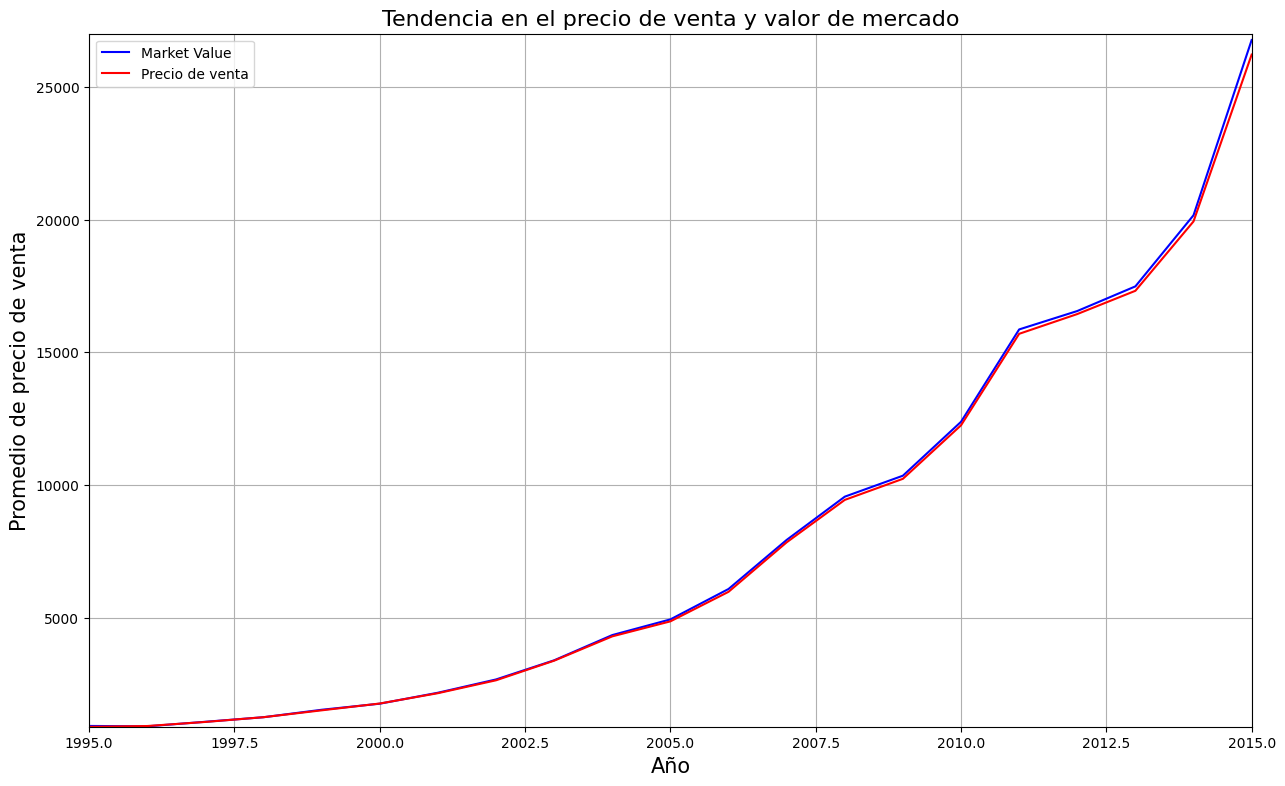

In [58]:
plt.figure(figsize=(15,9))
plt.plot(g1["year"],g1['mmr'],color="blue",label="Market Value")
plt.plot(g1["year"],g1['sellingprice'],color="red",label="Precio de venta")
plt.xlim(left=1995,right=2015)
plt.ylim(bottom=900,top=27000)
plt.ylabel("Promedio de precio de venta", fontsize = 15)
plt.xlabel("Año", fontsize =15)
plt.title("Tendencia en el precio de venta y valor de mercado", fontsize=16)
plt.grid()
plt.legend()
plt.show()

**En el siguiente gráfico podemos ver como aumenta tanto el valor de mercado como el precio de venta promedio durante los distintos años de fabricación de los carros, por lo que, por lo general mientras más antiguo sea el carro, menor será su valor. Además, podemos ver que el precio de venta casi siempre esta ligeramente por debajo de su valor de mercado, por lo que podemos deducir que es un mercado en el que no se suele descontar mucho en las ofertas.**

### Segunda visualización

In [59]:
g2=df.groupby(["make"])[["sellingprice"]].mean().sort_values(by="sellingprice",ascending=False).reset_index()
g2

,make,sellingprice
0,Rolls-Royce,153456.250000
1,Ferrari,128852.941176
2,Bentley,72713.333333
3,Tesla,67054.347826
4,Aston Martin,55500.000000
5,Maserati,43773.636364
6,Porsche,38632.922487
7,Land Rover,33127.713004
8,Ram,25237.849840
9,BMW,21340.817591


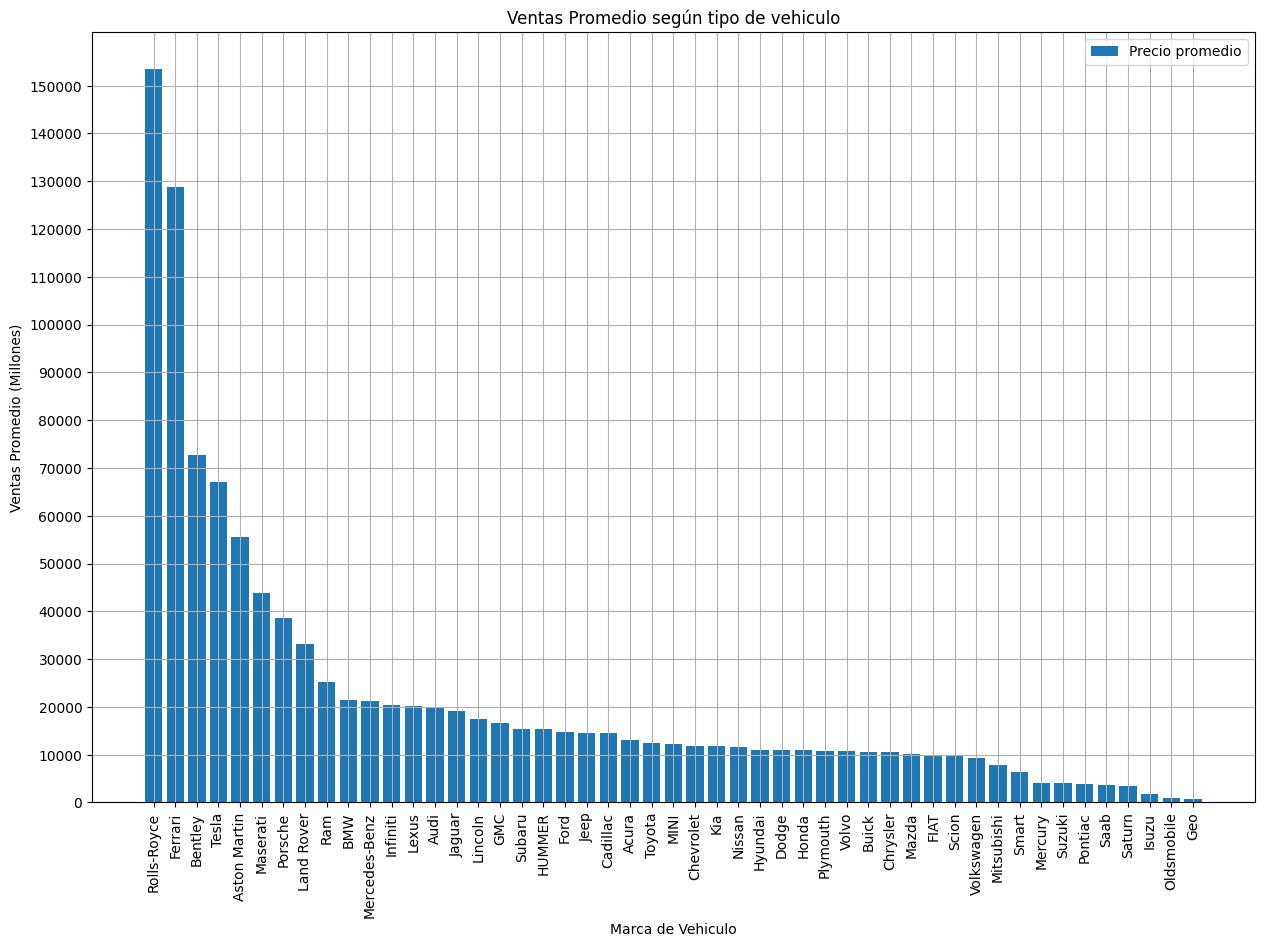

In [60]:
plt.figure(figsize=(15,10))
plt.bar(g2["make"],g2['sellingprice'],label="Precio promedio")
plt.ylabel("Ventas Promedio (Millones)")
plt.xlabel("Marca de Vehiculo")
plt.title("Ventas Promedio según tipo de vehiculo")
plt.xticks(rotation=90)
plt.yticks(range(0,155000,10000))
plt.grid()
plt.legend()
plt.show()

**Vemos que la marca del vehículo es un factor importante para determinar su precio de venta, ya que vemos como marcas mejor posicionadas en cuanto a lujo cuestan en promedio mucho más que otras marcas conocidas pero mas enfocadas en lo comercial que en ser premium.**

### Tercera visualización

In [61]:
g3=df.groupby(["color"])[["mmr"]].mean().sort_values(by="mmr",ascending=False).reset_index()
g3

,color,mmr
0,charcoal,16408.294931
1,black,16030.792628
2,brown,15651.393270
3,off-white,15148.706210
4,white,14815.232284
5,gray,14064.019076
6,pink,13251.875000
7,orange,13008.536924
8,red,12915.465929
9,purple,12498.190661


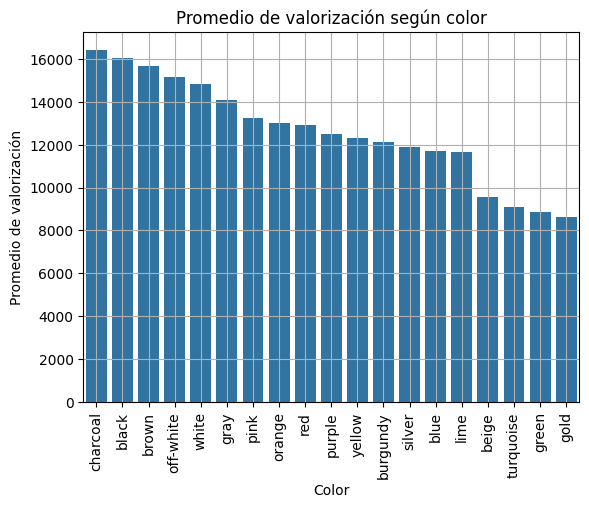

In [62]:
sns.barplot(x='color', y='mmr', data=g3)
plt.ylabel("Promedio de valorización")
plt.xlabel("Color")
plt.title("Promedio de valorización según color")
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Vemos como en promedio hay colores de carro que estan mejor valorados en el mercado, siendo el color carbón y el negro los mejores valorados, mientras que el verde y el dorado tienen menos valor en promedio. Por ello se concluye que el color es importante para determinar el precio de venta de un carro.**

## Estandarización de base

**Columna make**

In [66]:
df["make"].replace("Ford","0",inplace=True)
df["make"].replace("Chevrolet","1",inplace=True)
df["make"].replace("Nissan","2",inplace=True)
df["make"].replace("Toyota","3",inplace=True)
df["make"].replace("Honda","4",inplace=True)
df["make"].replace("Hyundai","5",inplace=True)
df["make"].replace("BMW","6",inplace=True)
df["make"].replace("Kia","7",inplace=True)
df["make"].replace("Chrysler","8",inplace=True)
df["make"].replace("Mercedes-Benz","9",inplace=True)
df["make"].replace("Infiniti","10",inplace=True)
df["make"].replace("Jeep","11",inplace=True)
df["make"].replace("Volkswagen","12",inplace=True)
df["make"].replace("Lexus","13",inplace=True)
df["make"].replace("GMC","14",inplace=True)
df["make"].replace("Mazda","15",inplace=True)
df["make"].replace("Cadillac","16",inplace=True)
df["make"].replace("Lincoln","17",inplace=True)
df["make"].replace("Audi","18",inplace=True)
df["make"].replace("Acura","19",inplace=True)
df["make"].replace("Buick","20",inplace=True)
df["make"].replace("Subaru","21",inplace=True)
df["make"].replace("Pontiac","22",inplace=True)
df["make"].replace("Ram","23",inplace=True)
df["make"].replace("Mitsubishi","24",inplace=True)
df["make"].replace("Volvo","25",inplace=True)
df["make"].replace("MINI","26",inplace=True)
df["make"].replace("Saturn","27",inplace=True)
df["make"].replace("Mercury","28",inplace=True)
df["make"].replace("Scion","29",inplace=True)
df["make"].replace("Land Rover","30",inplace=True)
df["make"].replace("Jaguar","31",inplace=True)
df["make"].replace("Porsche","32",inplace=True)
df["make"].replace("Suzuki","33",inplace=True)
df["make"].replace("HUMMER","34",inplace=True)
df["make"].replace("FIAT","35",inplace=True)
df["make"].replace("Saab","36",inplace=True)
df["make"].replace("Smart","37",inplace=True)
df["make"].replace("Oldsmobile","38",inplace=True)
df["make"].replace("Isuzu","39",inplace=True)
df["make"].replace("Maserati","40",inplace=True)
df["make"].replace("Bentley","41",inplace=True)
df["make"].replace("Aston Martin","42",inplace=True)
df["make"].replace("Tesla","43",inplace=True)
df["make"].replace("Ferrari","44",inplace=True)
df["make"].replace("Plymouth","45",inplace=True)
df["make"].replace("Rolls-Royce","46",inplace=True)
df["make"].replace("Geo","47",inplace=True)
df["make"].replace("Dodge","48",inplace=True)
df["make"] = df["make"].astype("int64")

**Columna body**

In [70]:
df["body"].replace("Sedan","0",inplace=True)
df["body"].replace("SUV","1",inplace=True)
df["body"].replace("Hatchback","2",inplace=True)
df["body"].replace("Minivan","3",inplace=True)
df["body"].replace("Coupe","4",inplace=True)
df["body"].replace("Crew Cab","5",inplace=True)
df["body"].replace("Wagon","6",inplace=True)
df["body"].replace("Convertible","7",inplace=True)
df["body"].replace("SuperCrew","8",inplace=True)
df["body"].replace("G Sedan","9",inplace=True)
df["body"].replace("SuperCab","10",inplace=True)
df["body"].replace("Regular Cab","11",inplace=True)
df["body"].replace("Extended Cab","12",inplace=True)
df["body"].replace("Quad Cab","13",inplace=True)
df["body"].replace("Van","14",inplace=True)
df["body"].replace("G Coupe","15",inplace=True)
df["body"].replace("Double Cab","16",inplace=True)
df["body"].replace("E-Series Van","17",inplace=True)
df["body"].replace("CrewMax Cab","18",inplace=True)
df["body"].replace("King Cab","19",inplace=True)
df["body"].replace("G Convertible","20",inplace=True)
df["body"].replace("Access Cab","21",inplace=True)
df["body"].replace("Genesis Coupe","22",inplace=True)
df["body"].replace("Koup","23",inplace=True)
df["body"].replace("Club Cab","24",inplace=True)
df["body"].replace("CTS Coupe","25",inplace=True)
df["body"].replace("Mega Cab","26",inplace=True)
df["body"].replace("Elantra Coupe","27",inplace=True)
df["body"].replace("Promaster Cargo Van","28",inplace=True)
df["body"].replace("Beetle Convertible","29",inplace=True)
df["body"].replace("Q60 Convertible","30",inplace=True)
df["body"].replace("Q60 Coupe","31",inplace=True)
df["body"].replace("Xtracab","32",inplace=True)
df["body"].replace("TSX Sport Wagon","33",inplace=True)
df["body"].replace("CTS-V Coupe","34",inplace=True)
df["body"].replace("G37 Convertible","35",inplace=True)
df["body"].replace("Transit Van","36",inplace=True)
df["body"].replace("Regular Coupe","37",inplace=True)
df["body"].replace("CTS Wagon","38",inplace=True)
df["body"].replace("G37 Coupe","39",inplace=True)
df["body"].replace("GranTurismo Convertible","40",inplace=True)
df["body"] = df["body"].astype("int64")

**Columna transmission**

In [73]:
df["transmission"].replace("automatic","0",inplace=True)
df["transmission"].replace("manual","0",inplace=True)
df["transmission"] = df["transmission"].astype("int64")

**Columna color**

In [75]:
df["color"].replace("black","0",inplace=True)
df["color"].replace("white","1",inplace=True)
df["color"].replace("silver","2",inplace=True)
df["color"].replace("gray","3",inplace=True)
df["color"].replace("blue","4",inplace=True)
df["color"].replace("red","5",inplace=True)
df["color"].replace("gold","6",inplace=True)
df["color"].replace("green","7",inplace=True)
df["color"].replace("burgundy","8",inplace=True)
df["color"].replace("beige","9",inplace=True)
df["color"].replace("brown","10",inplace=True)
df["color"].replace("orange","11",inplace=True)
df["color"].replace("purple","12",inplace=True)
df["color"].replace("off-white","13",inplace=True)
df["color"].replace("yellow","14",inplace=True)
df["color"].replace("charcoal","15",inplace=True)
df["color"].replace("turquoise","16",inplace=True)
df["color"].replace("pink","17",inplace=True)
df["color"].replace("lime","18",inplace=True)
df["color"] = df["color"].astype("int64")

**Columna interior**

In [77]:
df["interior"].replace("black","0",inplace=True)
df["interior"].replace("gray","1",inplace=True)
df["interior"].replace("beige","2",inplace=True)
df["interior"].replace("tan","3",inplace=True)
df["interior"].replace("brown","4",inplace=True)
df["interior"].replace("red","5",inplace=True)
df["interior"].replace("silver","6",inplace=True)
df["interior"].replace("blue","7",inplace=True)
df["interior"].replace("off-white","8",inplace=True)
df["interior"].replace("gold","9",inplace=True)
df["interior"].replace("purple","10",inplace=True)
df["interior"].replace("white","11",inplace=True)
df["interior"].replace("green","12",inplace=True)
df["interior"].replace("burgundy","13",inplace=True)
df["interior"].replace("orange","14",inplace=True)
df["interior"].replace("yellow","15",inplace=True)
df["interior"] = df["interior"].astype("int64")

In [78]:
df.head()

,year,make,body,transmission,condition,odometer,color,interior,mmr,sellingprice
0,2015,7,1,0,5,16639,1,0,20500,21500
1,2015,7,1,0,5,9393,1,2,20800,21500
2,2014,6,0,0,45,1331,3,0,31900,30000
3,2015,25,0,0,41,14282,1,0,27500,27750
4,2014,6,0,0,43,2641,3,0,66000,67000


**Ahora tenemos nuestra base estandarizada y lista para realizar la predicción**

## Agrupación

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

**Primero modelamos los datos**

In [80]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

**Utilizamos Kmeans y un gráfico de codos para obtener la cantidad adecuada de grupos a usar**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

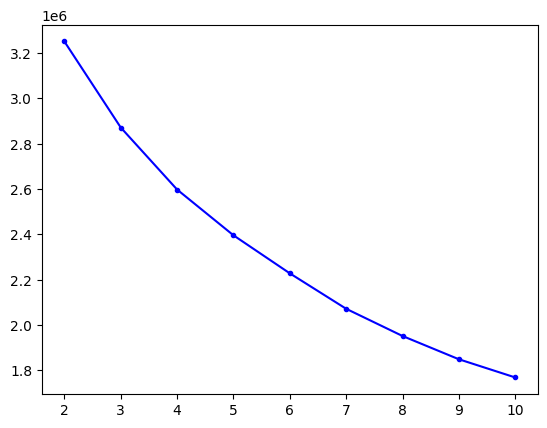

In [81]:
score = []
k_clusters = range(2,11)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    score.append(-kmeans.score(df_scaled))

plt.plot(k_clusters, score,'b.-')

**Utilizamos el score silueta para obtener la cantidad óptima de grupos**

In [ ]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_scaled)
silhouette_score(df_scaled, kmeans.labels_)

**Vemos que el número óptimo de grupos es 2.**

## PCA

**Primero dividimos nuestra base en train y test.**

In [87]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
X = df.drop(["sellingprice"], axis=1)
y = df["sellingprice"]
X.head()

,year,make,body,transmission,condition,odometer,color,interior,mmr
0,2015,7,1,0,5,16639,1,0,20500
1,2015,7,1,0,5,9393,1,2,20800
2,2014,6,0,0,45,1331,3,0,31900
3,2015,25,0,0,41,14282,1,0,27500
4,2014,6,0,0,43,2641,3,0,66000


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Vemos con cuantas columnas nuestro modelo podria seguir funcionando a un porcentaje óptimo.**

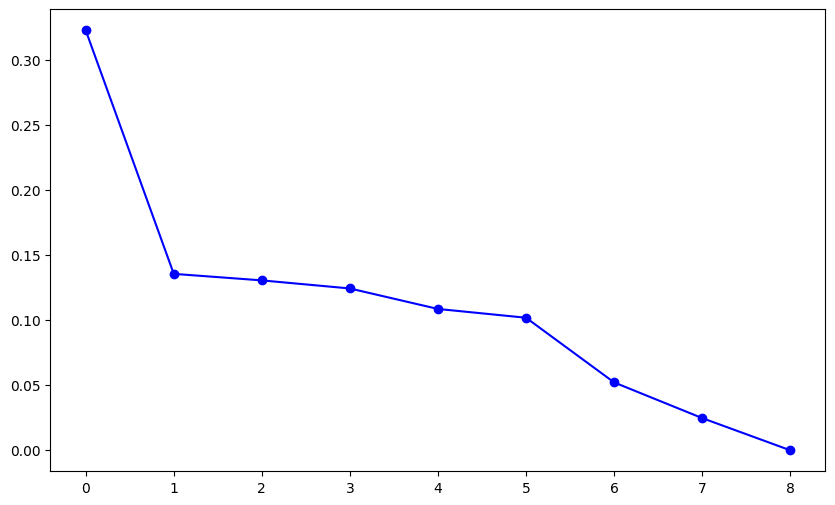

In [90]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10,6))
plt.plot(pca.explained_variance_ratio_,'bo-')
plt.show()

In [91]:
pca = PCA(n_components=.95)

In [92]:
pca = PCA()
pcs = pca.fit_transform(X)
print(pcs.shape)
print(X.shape)

(480063, 9)
(480063, 9)


In [93]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca = pca.transform(X_test)
X_test_pca_df = pd.DataFrame(X_test_pca)

X_train_pca_df

print("El número de componentes es", pca.n_components_, "de", pca.n_features_)

El número de componentes es 7 de 9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


**Con 7 columnas nuestro modelo seguiria funcionando a un 95%.**

In [98]:
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
score = knn_pca.score(X_test_pca, y_test)
score

0.026309028669828288

In [97]:
%%time
preds_knn_pca = knn_pca.predict(X_test_pca)

CPU times: user 17.9 s, sys: 356 ms, total: 18.3 s
Wall time: 24.8 s


**El porcentaje de eficiencia es bajo pero el tiempo de trabajo tambien es bajo.**

## Deep Learning

**Primero utilizaremos una red neuronal simple**

**Definimos un modelo secuencial**

In [99]:
model = Sequential()

**Colocamos las capas de entrada**

In [100]:
X_train.shape

(336044, 9)

In [101]:
input_shape = X_train.shape[1]
input_shape

9

**Definimos la función de activación**

In [102]:
model.add(Dense(19,
                input_dim = input_shape, #
                activation = 'relu'))
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

**Compilamos el modelo, para ello utilizamos un optimizador adam**

In [103]:
model.compile(loss = 'bce', optimizer = 'adam')

In [105]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
10502/10502 [==============================] - 37s 3ms/step - loss: -914783797248.0000 - val_loss: -1155114205184.0000
Epoch 2/10
10502/10502 [==============================] - 30s 3ms/step - loss: -1456112009216.0000 - val_loss: -1778192744448.0000
Epoch 3/10
10502/10502 [==============================] - 29s 3ms/step - loss: -2173056843776.0000 - val_loss: -2588980805632.0000
Epoch 4/10
10502/10502 [==============================] - 25s 2ms/step - loss: -3091312148480.0000 - val_loss: -3614574641152.0000
Epoch 5/10
10502/10502 [==============================] - 31s 3ms/step - loss: -4234758586368.0000 - val_loss: -4875079909376.0000
Epoch 6/10
10502/10502 [==============================] - 32s 3ms/step - loss: -5628511125504.0000 - val_loss: -6397452353536.0000
Epoch 7/10
10502/10502 [==============================] - 41s 4ms/step - loss: -7292058075136.0000 - val_loss: -8201636413440.0000
Epoch 8/10
10502/10502 [==============================] - 37s 3ms/step - loss: -9249

**Visualizamos el historial de perdida**

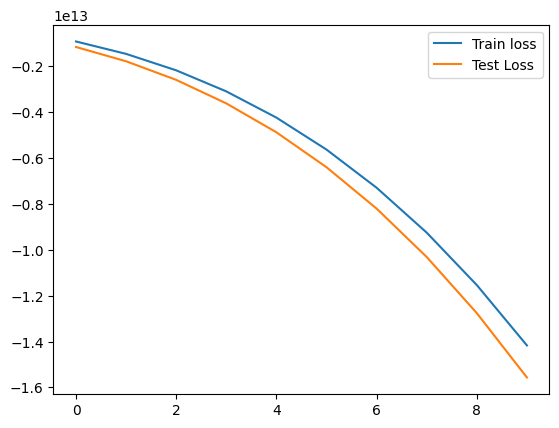

In [106]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

**Evaluamos el entrenamiento**

In [107]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**En este modelo vemos que no hay overfit, pero que el train y el test tienden mucho a la baja.**

**Ahora utilizaremos una red neuronal con dropout**

**Compilamos el modelo con dropout**

In [109]:
model.add(Dense(19,
                input_dim = input_shape,
                activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(10,
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
10502/10502 [==============================] - 44s 4ms/step - loss: -2097607680.0000 - val_loss: -7343782400.0000
Epoch 2/10
10502/10502 [==============================] - 40s 4ms/step - loss: -22384070656.0000 - val_loss: -43607277568.0000
Epoch 3/10
10502/10502 [==============================] - 58s 5ms/step - loss: -81256579072.0000 - val_loss: -127644975104.0000
Epoch 4/10
10502/10502 [==============================] - 38s 4ms/step - loss: -197419040768.0000 - val_loss: -277700771840.0000
Epoch 5/10
10502/10502 [==============================] - 38s 4ms/step - loss: -389012258816.0000 - val_loss: -512009895936.0000
Epoch 6/10
10502/10502 [==============================] - 35s 3ms/step - loss: -673698349056.0000 - val_loss: -848072409088.0000
Epoch 7/10
10502/10502 [==============================] - 38s 4ms/step - loss: -1070633189376.0000 - val_loss: -1304096931840.0000
Epoch 8/10
10502/10502 [==============================] - 34s 3ms/step - loss: -1596940353536.0000 - v

**Visualizamos la pérdida**

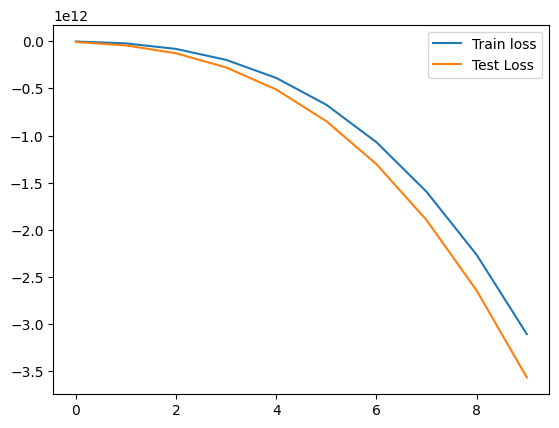

In [110]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

**En este segundo modelo vemos algo muy parecido al modelo anterior, que tanto el train como el test tienden a la baja, aunque el overfitting es menor en este modelo.**

**Ahora utilizaremos un modelo con detención anticipada**

**Compilamos el modelo con detención anticipada**

In [111]:
model.add(Dense(10,
                input_dim = input_shape,
                activation = 'relu'))
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
10502/10502 [==============================] - 45s 4ms/step - loss: -397361504.0000 - val_loss: -1364616960.0000
Epoch 2/100
10502/10502 [==============================] - 51s 5ms/step - loss: -4048375040.0000 - val_loss: -7816828928.0000
Epoch 3/100
10502/10502 [==============================] - 38s 4ms/step - loss: -14444448768.0000 - val_loss: -22578694144.0000
Epoch 4/100
10502/10502 [==============================] - 43s 4ms/step - loss: -34763980800.0000 - val_loss: -48769708032.0000
Epoch 5/100
10502/10502 [==============================] - 53s 5ms/step - loss: -68070559744.0000 - val_loss: -89448841216.0000
Epoch 6/100
10502/10502 [==============================] - 57s 5ms/step - loss: -117515255808.0000 - val_loss: -147709673472.0000
Epoch 7/100
10502/10502 [==============================] - 56s 5ms/step - loss: -186129514496.0000 - val_loss: -226519580672.0000
Epoch 8/100
10502/10502 [==============================] - 47s 5ms/step - loss: -276998488064.0000 - val_

**Visualizamos la pérdida**

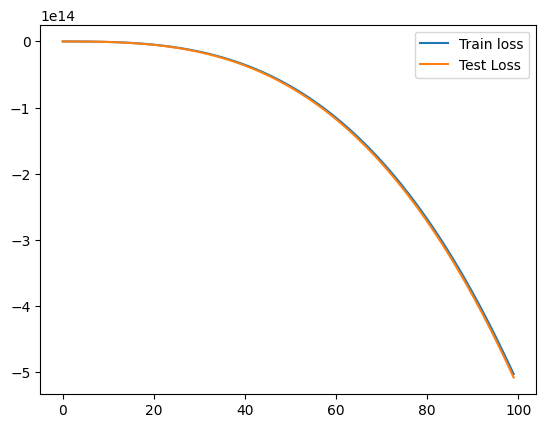

In [112]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 dense_3 (Dense)             (None, 19)                38        
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0

## Conclusiones

**El modelo que se elegiría para este modelo en particular es el de detención anticipada, ya que presenta el menor porcentaje de overfit y no tiende tanto a la baja como los demás modelos.**


**Sin embargo, no se logró predecir el precio de venta de los carros de forma eficiente, dado que ningún modelo obtuvo un porcentaje alto, esto se puede deber a que los datos no son suficientes para predecir el precio de venta y existen otros factores no visualizados en este Dataframe.**

**A pesar de esto se ha obtenido información importante que nos permite ver tendencias importantes en la marca de los carros, en los colores de los carros y las tendencias que predominaran en el futuro sobre el rubro automotriz.**

## Bibliografía



*   https://colab.research.google.com/drive/12cDxZ_muSSaHpaBhxYKlvyzFK1agfF2j#scrollTo=5kfPO0Ua-ItB
*   https://github.com/jeedorsa/Data-Analytics-CD/blob/main/12-NeuralNetworks/12-NeuralNetworks.ipynb

*   https://colab.research.google.com/drive/1sotVux9RSAZt4d925gXAq8eVFcAXl2tk
*   https://colab.research.google.com/drive/18M_aYdjhl_Doz8vZlH9uY40iL0cxyM0P


*   https://colab.research.google.com/drive/1gdyiL9t2ZHh4yAUVkzAtzrKJMzK8dRys#scrollTo=u2sfEF2NEUzA
*   https://colab.research.google.com/drive/16fVfPfS5Qu8XUW5cGXPaUlaEbKH-AqL6#scrollTo=MyQH7Dds6e7P

